# 4. Supervised machine learning - Regression
** **
## Table of contents:

1. Importing libraries <br>
2. Importing dataframe <br>
3. Preliminary checks
    - 3.1 Missing values and 0 values
    - 3.2 Checking extreme values
4. Hypothesis definition
5. Regression analysis
    - 5.1 Reshaping variables into NumPy arrays
    - 5.2 Splitting data
    - 5.3 Creating and fitting the regression object
    - 5.4 Testing predictions
    - 5.5 Summary statistics
    - 5.6 Comparing actual values and predicted values
6. Improving the regression
    - 6.1 Removing outliers
    - 6.2 Reshaping variables into NumPy arrays
    - 6.3 Splitting data
    - 6.4 Creating and fitting the regression object
    - 6.5 Testing predictions
    - 6.6 Summary statistics
    - 6.7 Comparing actual values and predicted values
7. Conclusions

# 1. Importing libraries
** **

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

# 2. Importing dataframe
** **

In [3]:
# Creating a path variabile for the folder
path = r'C:\Users\Simone\Desktop\Career Foundry\Esercizi modulo 7\CO2 emissions analysis'

In [4]:
# Importing the dataframe
df_co2 = pd.read_pickle(os.path.join(path, '02. Data', 'Prepared Data', 'emissions_clean_2015_no_countries_no_aggregations_flags.pkl'))

In [5]:
# Printing the first 5 rows
df_co2.head()

,Country,Energy_type,Year,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission,GDP_category,CO2_category,Average_CO2_emission
0,Afghanistan,coal,2015,0.03,0.03,72.06,34414.0,3.67,1.75,2.95,Medium-high,Low,1.5824
1,Afghanistan,natural_gas,2015,0.01,0.01,72.06,34414.0,3.67,1.75,0.28,Medium-high,Low,1.5824
2,Afghanistan,petroleum_n_other_liquids,2015,0.07,0.00,72.06,34414.0,3.67,1.75,3.94,Medium-high,Low,1.5824
3,Afghanistan,nuclear,2015,NaN,NaN,72.06,34414.0,3.67,1.75,0.00,Medium-high,Low,1.5824
4,Afghanistan,renewables_n_other,2015,0.02,0.01,72.06,34414.0,3.67,1.75,0.00,Medium-high,Low,1.5824


Last time, I removed some rows modifying the dataframe, but I forgot to reset the index.

In [6]:
# Resetting the index
df_co2 = df_co2.reset_index(drop = True)

In [7]:
# Printing the first 5 rows
df_co2.head()

,Country,Energy_type,Year,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission,GDP_category,CO2_category,Average_CO2_emission
0,Afghanistan,coal,2015,0.03,0.03,72.06,34414.0,3.67,1.75,2.95,Medium-high,Low,1.5824
1,Afghanistan,natural_gas,2015,0.01,0.01,72.06,34414.0,3.67,1.75,0.28,Medium-high,Low,1.5824
2,Afghanistan,petroleum_n_other_liquids,2015,0.07,0.00,72.06,34414.0,3.67,1.75,3.94,Medium-high,Low,1.5824
3,Afghanistan,nuclear,2015,NaN,NaN,72.06,34414.0,3.67,1.75,0.00,Medium-high,Low,1.5824
4,Afghanistan,renewables_n_other,2015,0.02,0.01,72.06,34414.0,3.67,1.75,0.00,Medium-high,Low,1.5824


In [8]:
# Checking the shape
df_co2.shape

(5250, 13)

In [9]:
# Exporting the dataframe (overwriting) so I don't have to reset the index in the next script
df_co2.to_pickle(os.path.join(path, '02. Data','Prepared Data', 'emissions_clean_2015_no_countries_no_aggregations_flags.pkl'))

# 3. Preliminary checks
** **

Before running our regression, we need to prepare our data, checking missing values and extreme values.

## 3.1 Missing values and 0 values

We already know there are some missing values in our dataframe. Let's check again:

In [10]:
# Check for missing values

df_co2.isnull().sum()

Country                          0
Energy_type                      0
Year                             0
Energy_consumption             896
Energy_production              895
GDP                            190
Population                     175
Energy_intensity_per_capita    125
Energy_intensity_by_GDP        125
CO2_emission                     0
GDP_category                   190
CO2_category                     8
Average_CO2_emission             0
dtype: int64

The variables I'm interested in are Energy_consumption and CO2_emission. <br>
While we have 0 missing values in CO2_emission (8 were imputated) we still have 896 missing values for Energy_consumption. <br>
We need to create a new dataframe that does not contain observations with NaN.

In [11]:
# Creating a new dataframe that doesn't contain missing values in the variable of interest
df_co2_reg = df_co2[df_co2['Energy_consumption'].isnull() == False]

In [12]:
# Checking the shape
df_co2_reg.shape

(4354, 13)

The new dataframe has 896 less observations. Let's see if the missing values are 0.

In [13]:
# Check for missing values

df_co2_reg.isnull().sum()

Country                          0
Energy_type                      0
Year                             0
Energy_consumption               0
Energy_production                0
GDP                            151
Population                     140
Energy_intensity_per_capita    100
Energy_intensity_by_GDP        100
CO2_emission                     0
GDP_category                   151
CO2_category                     7
Average_CO2_emission             0
dtype: int64

Removing the observations with Energy_consumption NaN removed also missing values for Energy_production. <br>
Let's move on.

Now we just need to remove the "0" values. We don't know for sure if they're missing values, but they could affect our regression.

In [14]:
# Removing 0 values
df_co2_reg = df_co2_reg[df_co2_reg['CO2_emission'] >= 0.00001]

In [15]:
df_co2_reg = df_co2_reg[df_co2_reg['Energy_consumption'] >= 0.00001]

In [16]:
# Checking the shape
df_co2_reg.shape

(1960, 13)

Well, our dataset got significantly smaller, but we have almost 2000 observations ready to be tested.

## 3.2 Checking extreme values

Outliers can affect the performance of our model, so we should check at least the distribution of the variables we want to investigate.

C:\Users\Simone\AppData\Local\Temp\ipykernel_10856\3097751389.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_co2_reg['CO2_emission'], bins=25)


<Axes: xlabel='CO2_emission', ylabel='Density'>

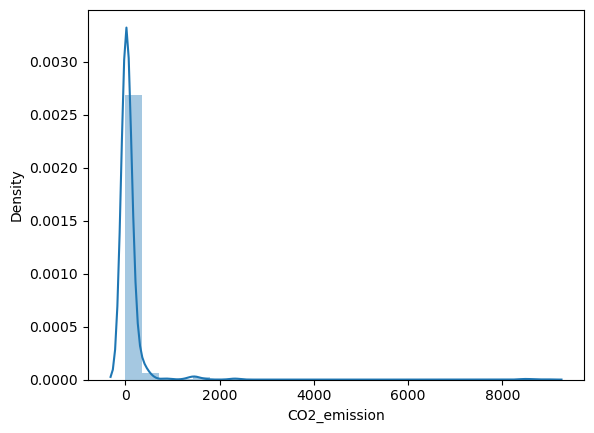

In [17]:
sns.distplot(df_co2_reg['CO2_emission'], bins=25)

We already know that there are some high values related to United States and China. <br>
Let's try to train our model on the complete dataset. If the results are poor, we will try removing outliers.

C:\Users\Simone\AppData\Local\Temp\ipykernel_10856\1845994774.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_co2_reg['Energy_consumption'], bins=25)


<Axes: xlabel='Energy_consumption', ylabel='Density'>

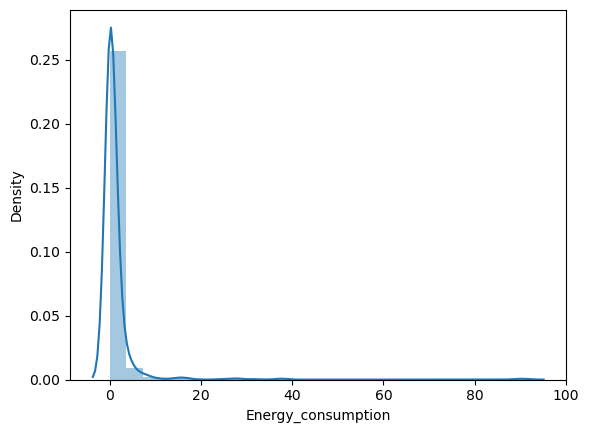

In [18]:
sns.distplot(df_co2_reg['Energy_consumption'], bins=25)

Same story with our Energy_consumption. Let's carry on for now, and see if we manage to improve our results later.

# 4. Hypothesis definition
** **

Back in script 2, I found an high correlation between "Energy_consumption" and "CO2_emission". <br>
I also analyzed the two variables in a scatterplot and it appeared to me they had a linear relationship. <br>
So, I defined my hypothesis as the following: <br>
<br>
<i> The average energy consumption of Countries with "high" CO2 emissions will be higher than the average energy consumption of Countries with "low" CO2 emissions </i>

To simplify for the sake of this regression analysis, let's say that: <br>
<br>
<i>The higher the Energy consumption, the higher the CO2 emissions.</i>

For reference, this is a scatterplot between the two variables:

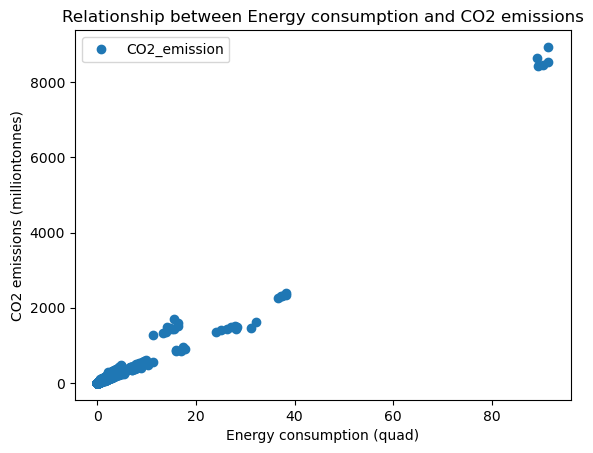

In [19]:
df_co2_reg.plot(x = 'Energy_consumption', y = 'CO2_emission',style='o')
plt.title('Relationship between Energy consumption and CO2 emissions')  
plt.xlabel('Energy consumption (quad)')  
plt.ylabel('CO2 emissions (milliontonnes)')  
plt.show()

As you can see, besides a few outliers (China, United States and India) the relationship between the two variables seems linear.

# 5. Regression analysis
** **

## 5.1 Reshaping variables into NumPy arrays

In order to use the scikit learn functions, we need to reshape our two variables into NumPy arrays. <br>
Energy_consumption will be our independent variable (X) while CO2_emission will be our dependent variable (y)

In [20]:
# Turning the variables into arrays
X = df_co2_reg['Energy_consumption'].values.reshape (-1, 1)
y = df_co2_reg['CO2_emission'].values.reshape (-1, 1)

If know we check the output of the two variables, we will see that they will be arrays.

In [21]:
X

array([[0.03],
       [0.01],
       [0.07],
       ...,
       [0.05],
       [0.05],
       [0.06]])

In [22]:
y

array([[2.95],
       [0.28],
       [3.94],
       ...,
       [4.2 ],
       [4.59],
       [4.38]])

## 5.2 Splitting data

To create our model we need to split our data into a training set (used to train the model) and a test set (to test the model). <br>
The test data will contain only 30% of our observations

In [23]:
# Splitting data into a train set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## 5.3 Creating and fitting the regression object

First of all, I will create a regression object using the LinearRegression function.

In [24]:
# Creating a regression object

regression = LinearRegression()

No we will fill this object with the train set, to train our model.

In [25]:
# Filling the regression object
regression.fit(X_train, y_train)

LinearRegression()

## 5.4 Testing predictions

Now that our model is trained, it's time to unleash its power and predict our dependant variable (y) values, based on our independent variable (x) values.

In [26]:
# Creating predictions based on X values from test set
y_predicted = regression.predict(X_test)

Let's create a scatterplot to see of our model predicted the y values for our test data.

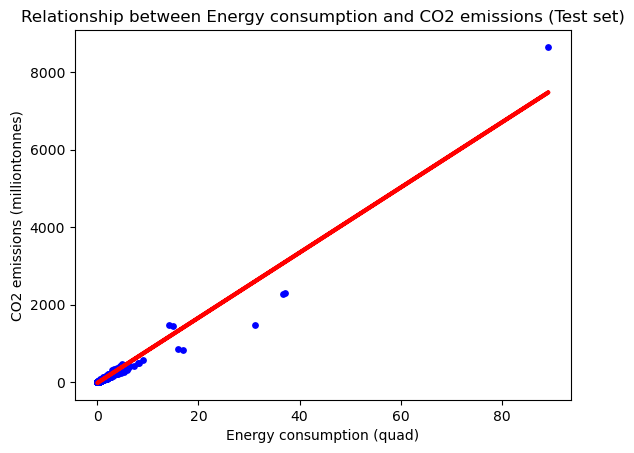

In [27]:
plot_test = plt
plot_test.scatter(X_test, y_test, color='blue', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Relationship between Energy consumption and CO2 emissions (Test set)')
plot_test.xlabel('Energy consumption (quad)')
plot_test.ylabel('CO2 emissions (milliontonnes)')
plot_test.show()

The red line represents y values predicted, based on x values. <br>
There are still some datapoints a little far from our predictions, because of some high CO2 values as explained earlier. <br>
It would be worthy to improve the model after removing these datapoints.

## 5.5 Summary statistics

To see how well the model performed (besides the chart above) we can check some summary statistics.

In [28]:
# Creating objects for mean squared error and r squared value.

rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [29]:
# Printing the content
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R squared score: ', r2)

Slope: [[84.05820491]]
Mean squared error:  8870.515859581694
R squared score:  0.9450539044403944


The slope tells us how much the y values change when x value change. <br>
A positive slope indicates that the two variables are in a positive relationship: as x increase, y increase as well. <br>
<br>
The mean squared error represents how accurate are our predictions. It's the average of the squared distance between the predicted values and the actual values. it's a little high. Let's see if can be improved with a new test. <br>
<br>
The R squared score represent how strong is the relationship. <br>
We already investigated the correlation between these two variables and we already know the relationship is strong.

## 5.6 Comparing actual values and predicted values

In [30]:
df_co2_reg_comparison = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
df_co2_reg_comparison.head(30)

,Actual,Predicted
0,10.47,-6.723545
1,20.89,-6.723545
2,0.65,-17.651112
3,92.01,131.972493
4,6.80,-7.564127
5,5.45,-12.607619
6,1.54,-16.810530
7,5.07,-10.085873
8,1.53,-16.810530
9,40.13,35.305557


Something is definitely off. Whenever an actual value is very low (like under 10) the predicted value is negative. <br>
However, when it comes to value around 90, the predictions is more accurate. <br>
The extreme values definitely skewed the results. We need to improve our regression analysis.

# 6. Improving the regression
** **

## 6.1 Removing outliers

So, we already know that there are some extreme values in our two variables. Let's restrict our dataframe.

In [31]:
# Removing extreme values
df_co2_reg_filter = df_co2_reg[df_co2_reg['CO2_emission'] <= 800]

C:\Users\Simone\AppData\Local\Temp\ipykernel_10856\3364717643.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_co2_reg_filter['CO2_emission'], bins=25)


<Axes: xlabel='CO2_emission', ylabel='Density'>

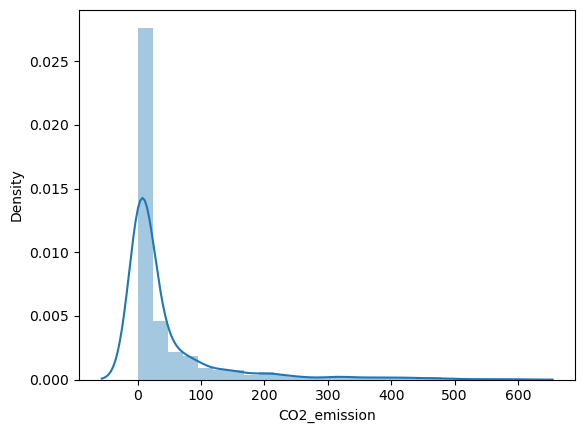

In [32]:
# Checking again the distribution
sns.distplot(df_co2_reg_filter['CO2_emission'], bins=25)

It seems better. Let's check the shape of our new dataframe.

In [33]:
df_co2_reg_filter.shape

(1925, 13)

Only 35 observations less! I think we successfully removed our outliers. <br>
Let's check the new distribution of our Energy consumption variable as well.

C:\Users\Simone\AppData\Local\Temp\ipykernel_10856\3117754691.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_co2_reg_filter['Energy_consumption'], bins=25)


<Axes: xlabel='Energy_consumption', ylabel='Density'>

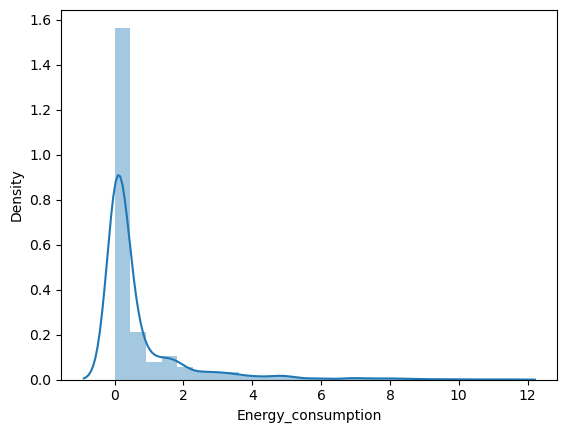

In [34]:
# Checking again the distribution
sns.distplot(df_co2_reg_filter['Energy_consumption'], bins=25)

The distribution changed here as well. Nice! Now I would like to take a look at the scatterplot.

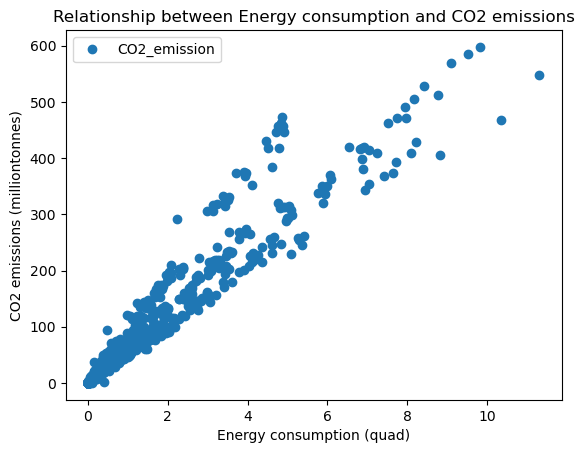

In [35]:
# Creating a new scatterplot after removing outliers
df_co2_reg_filter.plot(x = 'Energy_consumption', y = 'CO2_emission',style='o')
plt.title('Relationship between Energy consumption and CO2 emissions')  
plt.xlabel('Energy consumption (quad)')  
plt.ylabel('CO2 emissions (milliontonnes)')  
plt.show()

This chart, despite having only 35 datapoints less, gives us a better understanding of the relationship between the two variables. <br>
I am ready to a new regression!

## 6.2 Reshaping variables into NumPy arrays

Let's proceed again with all the steps. Let's start with reshaping our variables.

In [36]:
# Turning the variables into arrays
X_2 = df_co2_reg_filter['Energy_consumption'].values.reshape (-1, 1)
y_2 = df_co2_reg_filter['CO2_emission'].values.reshape (-1, 1)

In [37]:
# Testing the output
X_2

array([[0.03],
       [0.01],
       [0.07],
       ...,
       [0.05],
       [0.05],
       [0.06]])

In [38]:
# Testing the output
y_2

array([[2.95],
       [0.28],
       [3.94],
       ...,
       [4.2 ],
       [4.59],
       [4.38]])

## 6.3 Splitting data

In [39]:
# Splitting data into a train set and a test set
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

## 6.4 Creating and fitting the regression object

In [40]:
# Creating a regression object

regression_2 = LinearRegression()

Now let's fill our bbject with the new train data.

In [41]:
# Filling the regression object
regression_2.fit(X_train_2, y_train_2)

LinearRegression()

## 6.5 Testing predictions

In [42]:
# Creating predictions based on X values from test set
y_predicted_2 = regression_2.predict(X_test_2)

The moment of the truth. Let's create our brand new scatterplot with our brand new regression line.

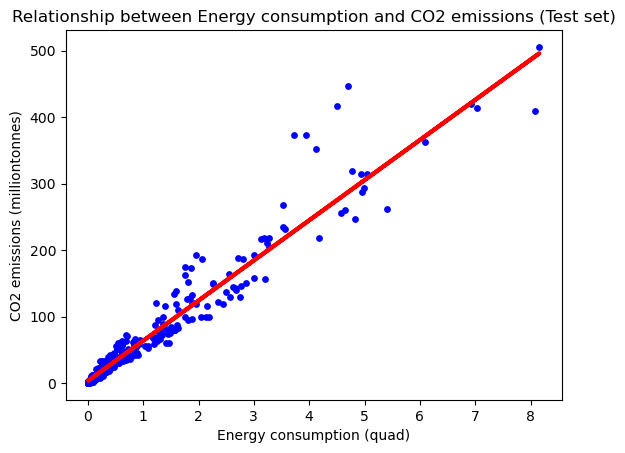

In [43]:
plot_test_2 = plt
plot_test_2.scatter(X_test_2, y_test_2, color='blue', s = 15)
plot_test_2.plot(X_test_2, y_predicted_2, color='red', linewidth =3)
plot_test_2.title('Relationship between Energy consumption and CO2 emissions (Test set)')
plot_test_2.xlabel('Energy consumption (quad)')
plot_test_2.ylabel('CO2 emissions (milliontonnes)')
plot_test_2.show()

Judging from the look of it, the accuracy of our new model should be higher. <br>
All datapoints are relatively closer to the regression line. <br>
To back our hypothesis, let's look at some summary data.

## 6.6 Summary statistics

In [44]:
# Creating objects for mean squared error and r squared value.

rmse_2 = mean_squared_error(y_test_2, y_predicted_2)
r2_2 = r2_score(y_test_2, y_predicted_2)

In [45]:
# Printing the content
print('Slope:' ,regression_2.coef_)
print('Mean squared error: ', rmse_2)
print('R squared score: ', r2_2)

Slope: [[60.42581119]]
Mean squared error:  309.57069173857417
R squared score:  0.9434908095433668


The slope decreased a little bit, but it still indicates (of course) a positive relationship. <br>
The mean squared error decreased drastically, so we can say our new model is definitely more accurate than the previous. <br>
The R squared value is still indicating a strong relationship between the two values.

# 6.7 Comparing actual values and predicted values

Let's conclude our analysis by looking at a comparison between actual values and predicted values.

In [46]:
df_co2_reg_comparison_2 = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
df_co2_reg_comparison_2.head(30)

,Actual,Predicted
0,0.73,3.720899
1,10.30,8.554963
2,0.85,3.720899
3,4.32,6.137931
4,192.88,184.394074
5,3.08,7.950705
6,32.96,27.891223
7,1.30,4.325157
8,2.53,4.325157
9,0.32,3.720899


Our predictions are much more accurate now! <br>
There is still some margin of error (usually the prediction is off by around 2-7) but is a huge improvement compared to our first regression. <br>
Some predictions are actually very close to the actual value (see for example index 20, 23 or 28).

# 7. Conclusions
** **

<b> In conclusion: </b> <br>
I think this model is a good fit and that can back up my research hypothesis: <br>
<i>The higher the Energy consumption, the higher the CO2 emissions.</i> <br>

According to data, this is partially true, at least in certain conditions. <br>
This model can be applied to the majority of data included in the dataframe, but isn't a good fit when it comes to extreme value. <br>
While Energy consumption may not be the only variable influencing CO2 emissions, it surely plays some part in it.

I don't see potential bias in here, except for the removal of the extreme values. <br>
We can't just pretend they don't exists. I removed them for the sake of the analysis but I should investigate further why these values are so different from the values registered in the majority of all other countries.